In [41]:
import numpy as np
import matplotlib.pyplot as plt
import bionetgen
import roadrunner

# Load model from BNGL
infile="lr_init.bngl"
model = bionetgen.bngmodel(infile) 
sim = model.setup_simulator() # sim is a libroadrunner simulator object

## Run a single simulation and plot the results

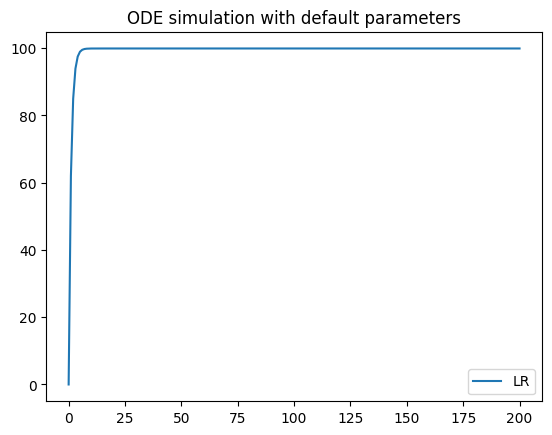

In [47]:
# Simulate using RoadRunner defaults (ODEs)
onames= [ o for o in model.observables]
pnames= [p for p in model.parameters]
fnames= [f for f in model.functions]
sel = ['Time'] + onames
#sim['kin_inh_factor']=1.0
#sim['L0']=100
sim.reset()
res1= sim.simulate(0,200,200,selections=sel)

# Plot observables
for o in onames:
    plt.plot(res1['time'],res1[o],label=o)
plt.title("ODE simulation with default parameters")
_= plt.legend()

In [49]:
print(pnames)
print(fnames)
rnames=[r for r in model.rules]
print(rnames)

['kp1', 'km1', 'L0']
[]
['LRbind']


## Compare results of two simulations

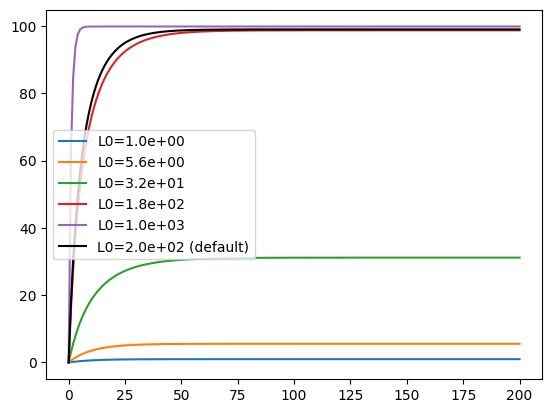

In [43]:
pname='L0'
for k in np.logspace(0,3,5): 
    sim[pname]=k
    sim.reset() 
    res2= sim.simulate(0,200,200,selections=sel)
    o= 'LR'
    plt.plot(res2['time'],res2[o],label=f'{pname}={k:0.1e}')
plt.plot(res1['time'],res1[o],'k', label= f'{pname}={sim['init('+pname+')']:0.1e} (default)')
plt.legend(loc='best')

## Scan the initial concentration of ligand and plot steady state value

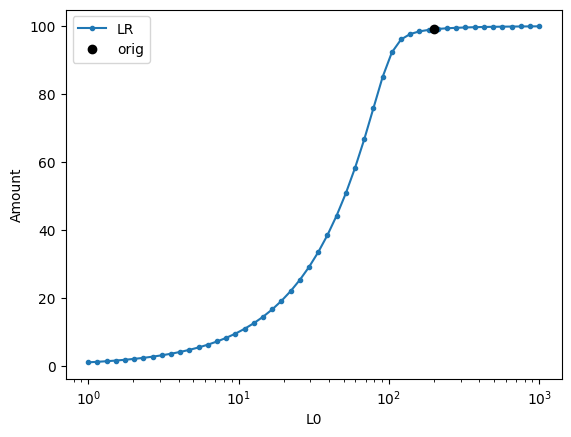

In [44]:
pname='L0'
o='LR'
out=[]
krange= np.logspace(0,3,50)
for k in krange: 
    sim[pname]=k
    # Must reset simulator AFTER changing initial condition.
    sim.reset() 
    res2= sim.simulate(0,200,200,selections=sel)
    res= res2[o][-1]
    #print(k,res)
    out.append(res)
plt.semilogx(krange,out,'.-',label=o)
plt.plot(sim['init(L0)'],res1[o][-1],'ko',label='orig')
plt.xlabel('L0')
plt.ylabel('Amount')
_= plt.legend(loc='best')

In [17]:
sim["init(L0)"]

200.0